In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import requests
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy as sp

In [3]:
#Part 1: Exploratory Data Analysis on Treasury Yield curve data


#1.0 Import the data:
df = pd.read_csv(r"C:\Users\weizi\Desktop\IE 517\hw 5\treasury.csv")
df.head()

number_of_rows = len(df)
print("The number of rows:", number_of_rows)

print("The number of colmuns:",len(df.columns))

print("The number of cells:",df.size)

# 1.1 Generate descriptive statistics:
descriptive_stat = df.describe()
print(descriptive_stat)

The number of rows: 8071
The number of colmuns: 32
The number of cells: 258272
           SVENF01      SVENF02      SVENF03      SVENF04      SVENF05  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000   
mean      3.785311     4.258972     4.669363     5.022430     5.318493   
std       2.648060     2.498137     2.341348     2.221632     2.137801   
min       0.072700     0.327300     0.630300     1.013000     1.424500   
25%       1.144050     1.865600     2.536550     3.023050     3.544700   
50%       3.986500     4.393300     4.505500     4.718900     5.051300   
75%       5.901500     6.221250     6.461300     6.626600     6.779550   
max       9.813800     9.887800    10.145600    10.459900    10.649900   

           SVENF06      SVENF07      SVENF08      SVENF09      SVENF10  ...  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000  ...   
mean      5.559644     5.750071     5.895135     6.000596     6.072112  ...   
std       2.08040

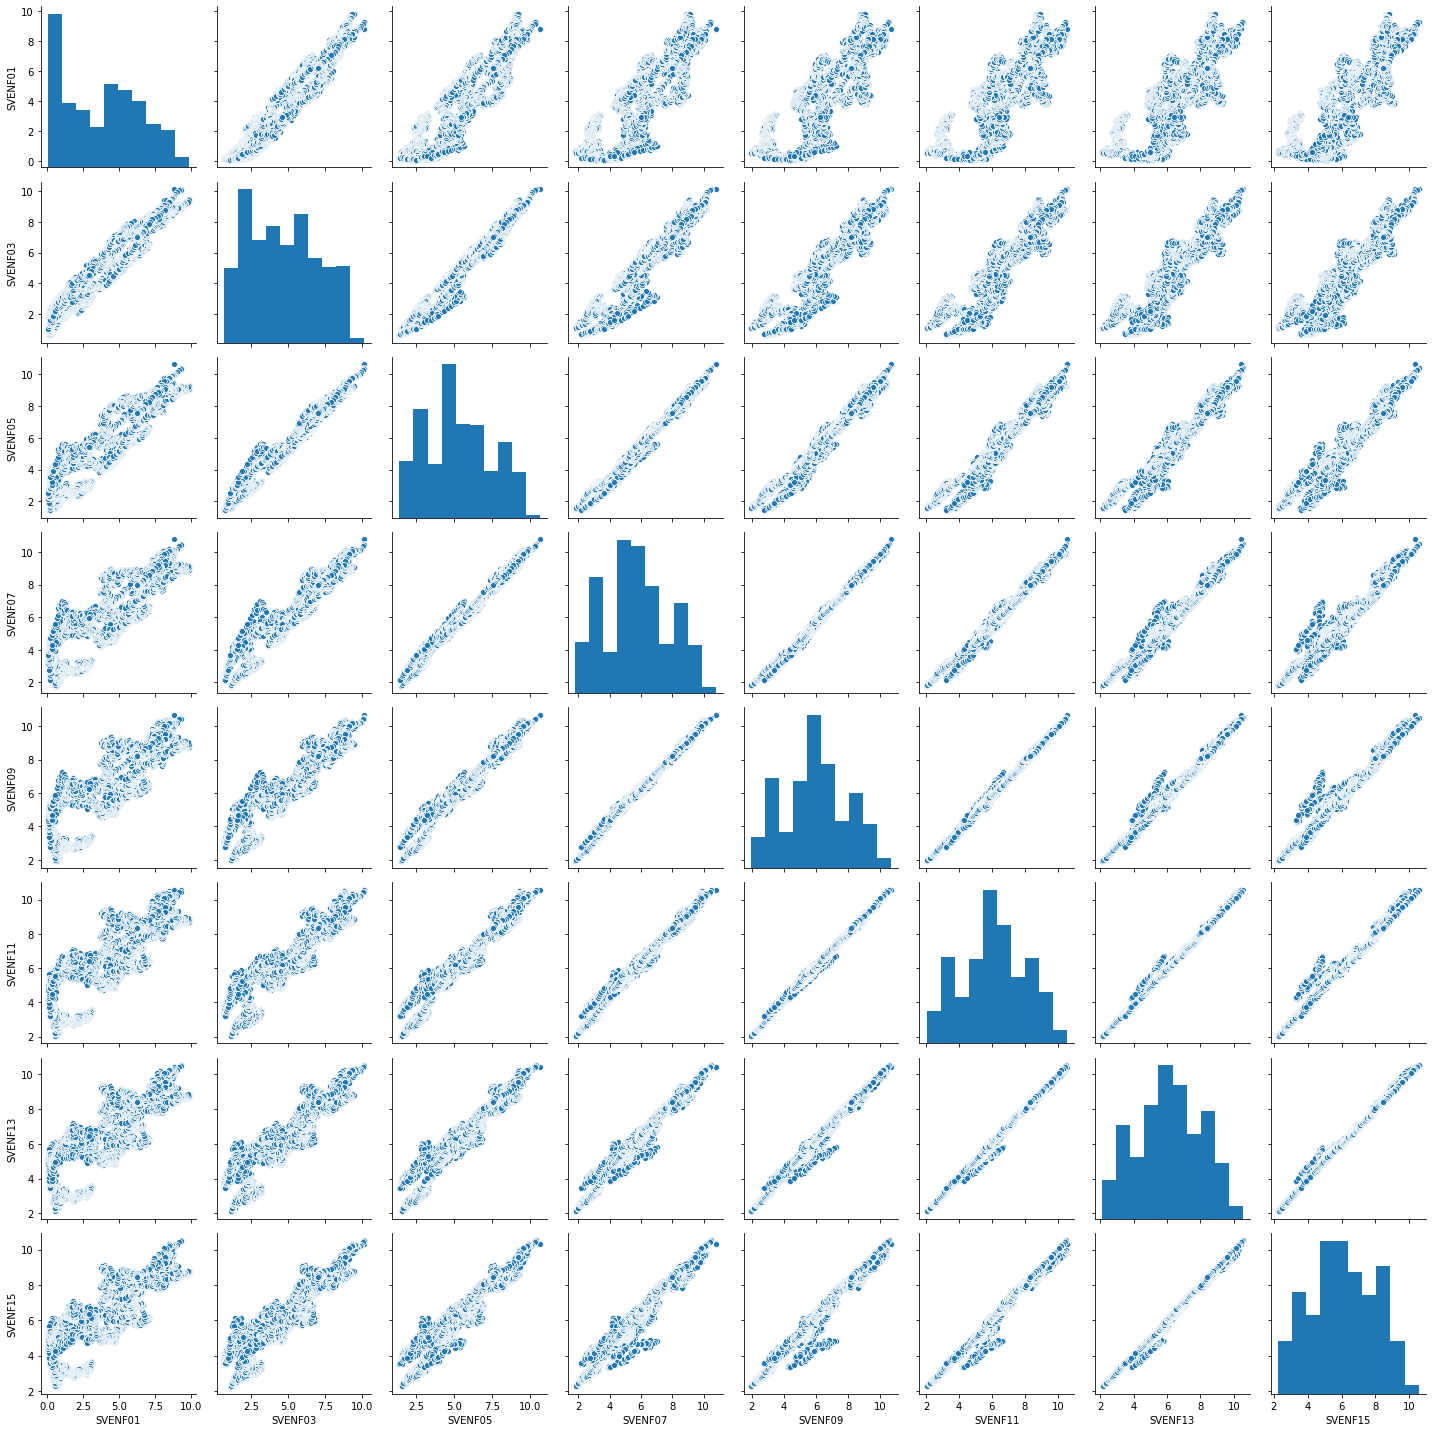

In [4]:
#1.2 Scatterplot matrix (visualizing the pair-wise correlation between
#different features):

#Delete the date column

del df['Date']
#Extract the bonds with matrity from 1 to 15 years in odd ending number:

odd_columns = ['SVENF01','SVENF03','SVENF05','SVENF07','SVENF09','SVENF11','SVENF13','SVENF15']

sns.pairplot(df[odd_columns], height= 2.5)

#minimize the white space
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

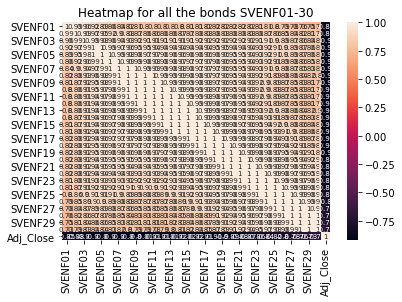

In [5]:
#1.3 Heatmap for all atributes
cm=DataFrame(df.corr())
sns.heatmap(cm,annot=True, annot_kws = {'size':7})
plt.title('Heatmap for all the bonds SVENF01-30')
plt.show

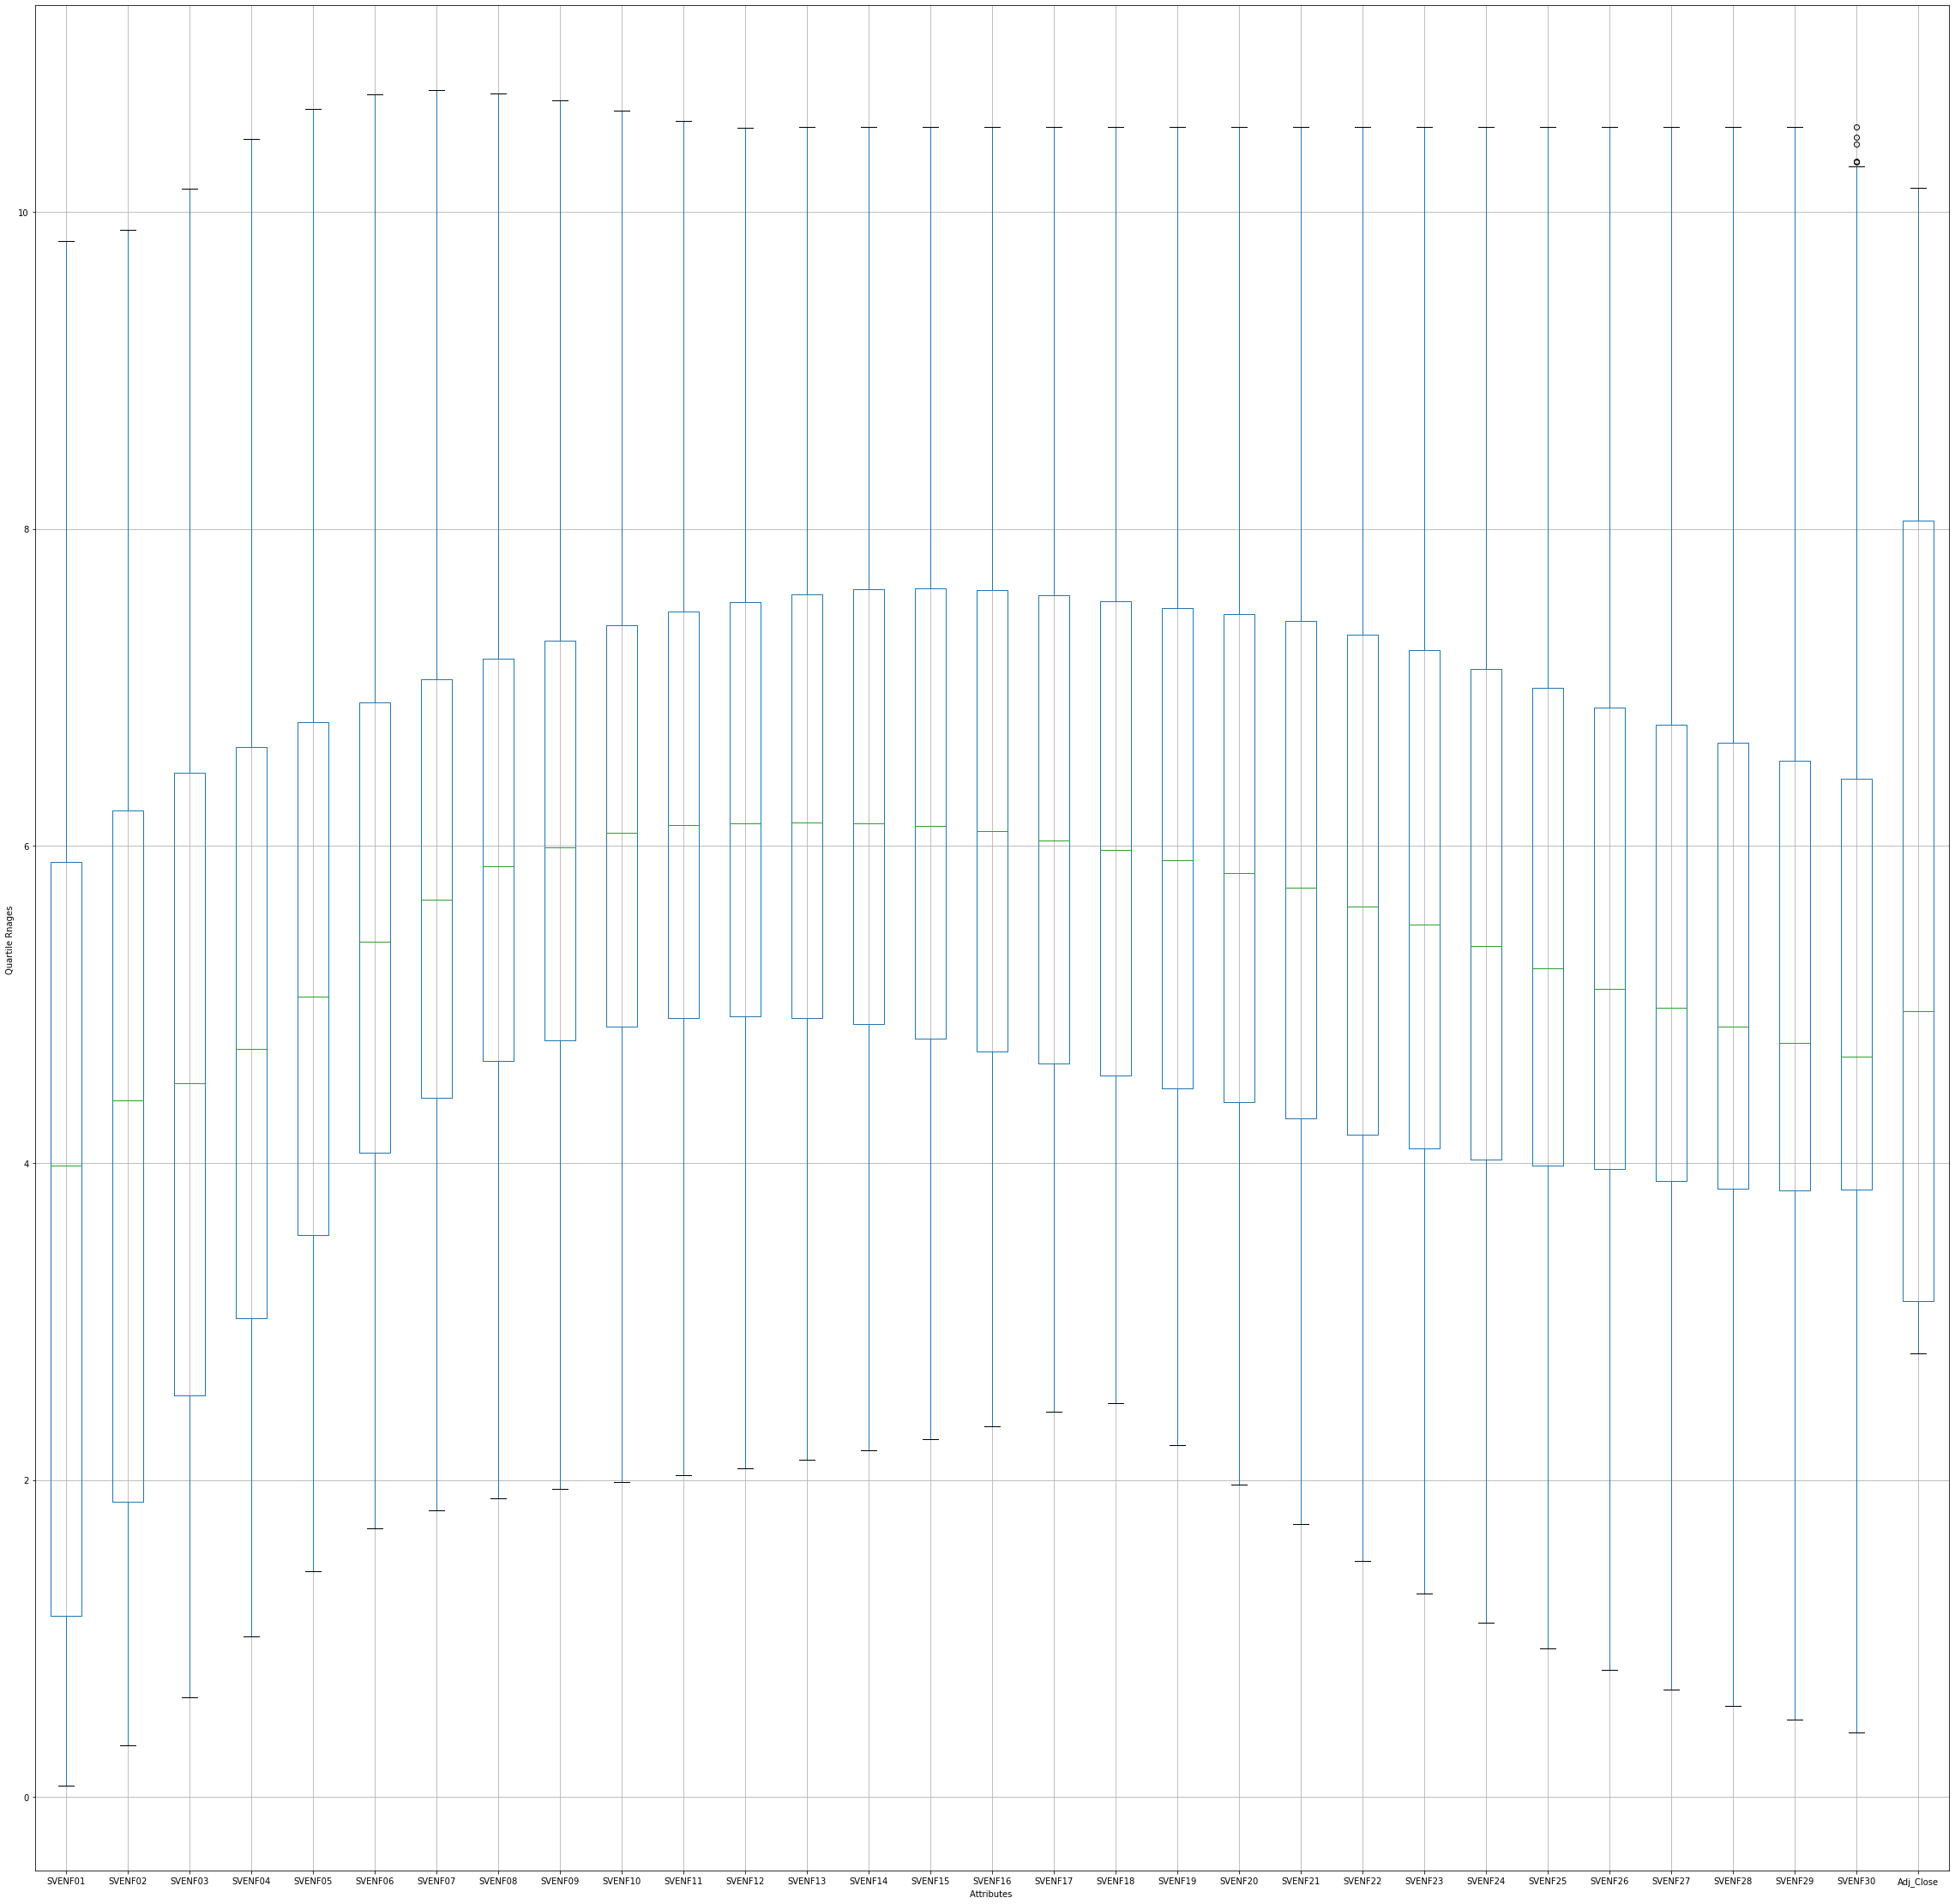

In [6]:
#1.4 Box plots



df.boxplot(figsize = (40,40))


_ = plt.xlabel('Attributes ')
_ = plt.ylabel('Quartile Rnages ')


plt.show()



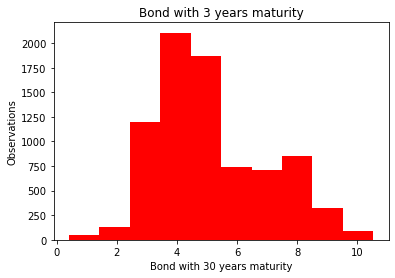

In [7]:
#1.5 Histogram for bond with 3 years maturity
_= plt.hist(df['SVENF30'], color = 'red')
_=plt.title('Bond with 3 years maturity')
_=plt.xlabel('Bond with 30 years maturity')
_=plt.ylabel('Observations')
plt.show()

In [8]:
#1.6 Split data data into training and test sets.  Use random_state = 42.
#Use 85% of the data for the training set

#SVENF 1-30      
X = df.iloc[:, 0:-1]
#y = adjusted close
y = df.iloc[: ,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

In [9]:
#1.7 Standardizing the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
# Part 2: Perform a PCA on the Treasury Yield dataset
from sklearn.decomposition import PCA

#2.1 Compute and display the explained variance ratio for all components
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
list_ratio= pca.explained_variance_ratio_

print("List of principal components: ", list_ratio, "when n =", len(list_ratio)
)



List of principal components:  [9.31796975e-01 4.07650756e-02 2.18438668e-02 4.85133058e-03
 6.63341250e-04 6.87379176e-05 9.48168675e-06 1.09876995e-06
 8.50910960e-08 6.74428451e-09 4.72621857e-10 3.80161775e-11
 9.30609065e-12 8.71811396e-12 8.59362280e-12 8.53519254e-12
 8.41818231e-12 8.32407041e-12 8.16475927e-12 8.12446450e-12
 7.94366171e-12 7.84486451e-12 7.70300119e-12 7.56475430e-12
 7.49445649e-12 7.39336209e-12 7.21415235e-12 6.93802195e-12
 6.58019099e-12 6.26023985e-12] when n = 30


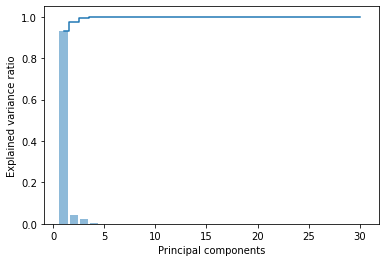

In [11]:
# 2.2 Cumulative explained variance plot of the 30 component version
plt.bar(range(1, 31), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 31), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

#The resulting plot indicates that the first principal component alone
#accounts for about 90 percent of the vairance.

In [12]:
#2.3 Recalculate and display on n_components=3.
pca=PCA(n_components=3)


X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
pca_explained_var_ratio = pca.explained_variance_ratio_


print("List of principal components: ", pca_explained_var_ratio, "when n =", len(pca_explained_var_ratio)
)


List of principal components:  [0.93179697 0.04076508 0.02184387] when n = 3


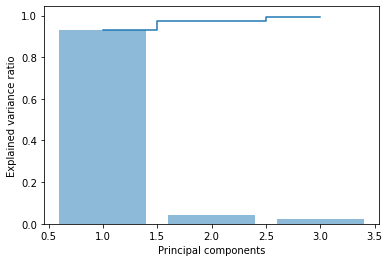

21.75


In [15]:
#2.4 Cumulative explained variance plot of the 3 component version

#Plot via Matplotib's step function for n =3:
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

#The resulting plot indicates that the first principal component alone
#accounts for about 90 percent of the vairance.

from time import process_time
ptime= process_time()
print(ptime)

In [17]:
#Part 3: : Linear regression v. SVM regressor - baseline

#3.1 Fit a linear regression model to both datasets (the original
#dataset with 30 attributes and the PCA transformed dataset with 3 PCs.)
#using SKlearn


pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

ptime1=process_time()
print(ptime1-ptime)


1.59375


In [19]:
#3.2 Calculating R^2 score and MSE for linear regression of n=30 components
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


ptime2=process_time()
print(ptime2-ptime1)

MSE train: 0.603, test: 0.612
R^2 train: 0.902, test: 0.904
1.0625


In [21]:
#3.3 Calculating R^2 score and MSE for linear regression of n=3 components
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LinearRegression()
lr = lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#3.3 Calculating R^2 score and MSE for linear regression of n=3 components

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

ptime3=process_time()
print(ptime3-ptime2)

MSE train: 0.820, test: 0.854
R^2 train: 0.867, test: 0.866
1.0625


In [22]:
# 3.4 Fit a SVM regressor model to n=30 datasets using SKlearn

from sklearn import svm

svm_30 = svm.SVR(kernel ='rbf', C= 1, gamma = 'scale')
svm_30.fit(X_train, y_train)
y_train_pred = svm_30.predict(X_train)
y_test_pred = svm_30.predict(X_test)

#3.5 Calculating R^2 score and MSE for SVM regressor model of n=30 components


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

ptime4=process_time()
print(ptime4-ptime3)

MSE train: 0.071, test: 0.070
R^2 train: 0.988, test: 0.989
3.15625


In [23]:
# 3.6 Fit a SVM regressor model to n=3 dataset using SKlearn

from sklearn import svm

svm_3 = svm.SVR(kernel ='rbf', C= 1, gamma = 'scale')
svm_3.fit(X_train_pca, y_train)
y_train_pred = svm_3.predict(X_train_pca)
y_test_pred = svm_3.predict(X_test_pca)

#3.7 Calculating R^2 score and MSE for SVM regressor model of n=3 components


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

ptime5= process_time()
print(ptime5-ptime4)

MSE train: 0.136, test: 0.143
R^2 train: 0.978, test: 0.978
1.234375


In [ ]:
print("My name is {Zicheng Wei}")
print("My NetID is: {wei41}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")